In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import math
import Chronos


In [3]:
def make_train_df():
    y_data = pd.date_range('2018-01-01', '2019-01-01').astype(np.int64)/(1e9*60*60*24)
    y_data = y_data - y_data.min()

    train_df = np.sin(np.arange(1,100))
    train_df = pd.DataFrame(data={"ds": pd.date_range('2018-01-01', '2019-01-01'),
                                  "y" : np.sin(y_data*2*math.pi/365.25)})
    return train_df
    

In [4]:
train_df = make_train_df()
train_df

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.017202
2,2018-01-03,0.034398
3,2018-01-04,0.051584
4,2018-01-05,0.068755
...,...,...
361,2018-12-28,-0.073045
362,2018-12-29,-0.055879
363,2018-12-30,-0.038696
364,2018-12-31,-0.021501


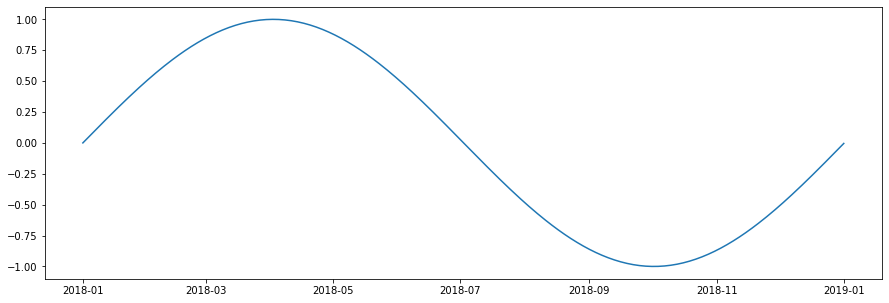

In [5]:
plt.figure(figsize=(15,5))
plt.plot(train_df['ds'], train_df['y'])
plt.show()

In [7]:
importlib.reload(Chronos)
train_df = make_train_df()
my_cr = Chronos.Chronos(G=1000,
                        p_m= 0.3, 
                        r_m = 0.4,
                        yearly_seasonality=5,
                        weekly_seasonality=1)
my_cr = my_cr.fit(train_df)

population initalized


In [8]:
result_df = my_cr.predict(train_df)
result_df.head()




,ds,y,yhat
0,2018-01-01,0.000000,1.086778
1,2018-01-02,0.017202,1.016423
2,2018-01-03,0.034398,1.088252
3,2018-01-04,0.051584,1.221009
4,2018-01-05,0.068755,1.285508


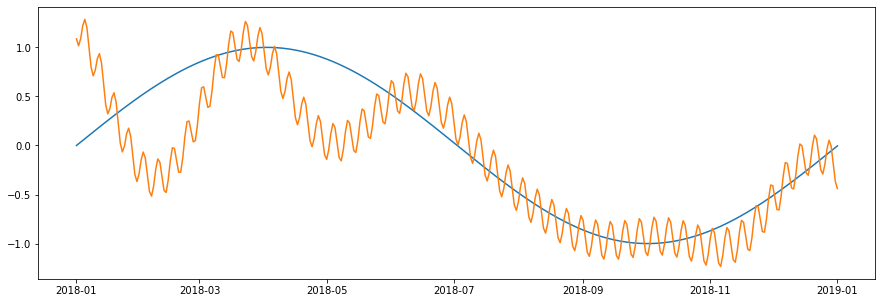

{'growth::const': 0.6157770864861567,
 'growth::coef': -0.004080170191199439,
 'yearly::order_1_coef': 0.305777697675884,
 'yearly::order_2_coef': -0.03932826139224049,
 'yearly::order_3_coef': -0.23149840983948988,
 'yearly::order_4_coef': 0.18402414896494318,
 'yearly::order_5_coef': -0.2157733604007223,
 'weekly::order_1_coef': 0.011745833266326361}

In [9]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

In [45]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-800:]
#df['y'] = df['y']*100

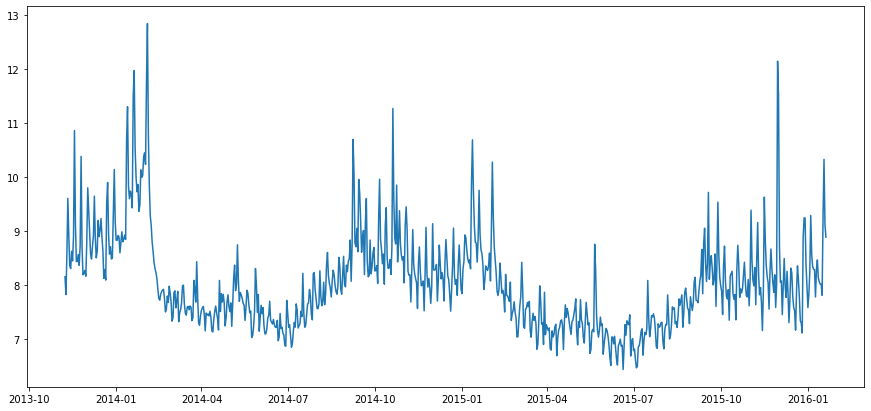

In [46]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [47]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]
print(train_df.shape)
print(validation_df.shape)

(640, 2)
(160, 2)


In [48]:
train_df

,ds,y
2105,2013-11-08,8.157657
2106,2013-11-09,7.829233
2107,2013-11-10,8.573952
2108,2013-11-11,9.611329
2109,2013-11-12,8.923858
...,...,...
2740,2015-08-08,7.007601
2741,2015-08-09,7.073270
2742,2015-08-10,7.265430
2743,2015-08-11,7.602401


In [91]:
importlib.reload(Chronos)
train_df = df.iloc[:-validation_size]
validation_df = df.iloc[-validation_size:]

my_cr = Chronos.Chronos(G=1000)
my_cr = my_cr.fit(train_df)

population initalized


In [92]:
result_df = my_cr.predict(train_df)
result_df.head()

,ds,y,yhat
2105,2013-11-08,8.157657,8.430920
2106,2013-11-09,7.829233,8.074142
2107,2013-11-10,8.573952,8.274397
2108,2013-11-11,9.611329,8.561976
2109,2013-11-12,8.923858,8.474229


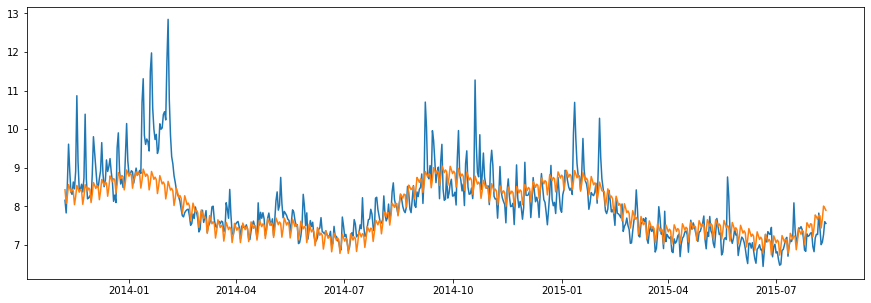

{'growth::const': 8.037189502845692,
 'growth::coef': -0.00011488405975215027,
 'yearly::order_1_coef': (-0.5114168855964295, 0.5728399513496234),
 'yearly::order_2_coef': (0.10004271456424846, -0.09459490650541633),
 'yearly::order_3_coef': (0.23333631266112118, 0.25495798585790624),
 'weekly::order_1_coef': (0.1425372614959407, 0.04245675801933685),
 'weekly::order_2_coef': (0.008819696182917211, 0.15245935443562877),
 'weekly::order_3_coef': (-0.0337019793816145, -0.00753240086249804)}

In [93]:
plt.figure(figsize=(15,5))
plt.plot(result_df['ds'], result_df['y'])
plt.plot(result_df['ds'], result_df['yhat'])
plt.show()
my_cr.get_params()

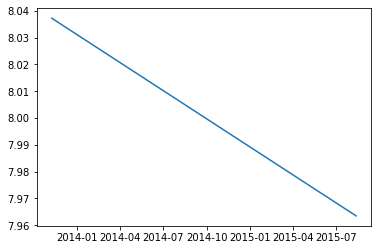

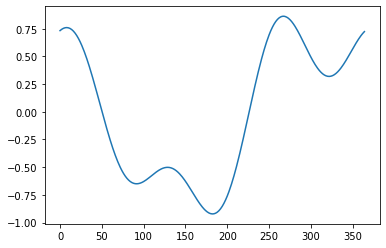

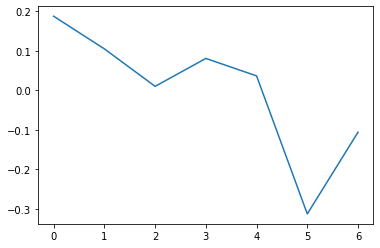

In [94]:
my_cr.plot_components(result_df)